<span style="color:red; font-size:larger; background-color:yellow">
     Project title :Analyzing Amazon Sales Data,
     Technologies :Data Science,
         Domain        :E-commerce,
     Project Difficulties level: Advanced
</span>



#Problem statement

<span style="color:red; font-size:larger; background-color:white">
      Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.
Do ETL: Extract-Transform-Load some Amazon dataset and find for me Sales-trend -> month-wise, year-wise, yearly_month-wise. Find key metrics and factors and show the meaningful relationships between attributes.

</span>



In [1]:
#Required libraries installing for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing Data
sales=pd.read_csv("Amazon Sales data.csv")
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
#Checking the shape
sales.shape

(100, 14)

<span style="color:red; font-size:larger;">
  Observation:We have total 100 rows and 14 columns
</span>

In [4]:
#checking the size
sales.size

1400

In [5]:
sales


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [6]:
#Checking the sales Data Frame information
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
#Determining the columns in the data frame
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
#Finding the missing values in the data frame.
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

<span style="color:red; font-size:larger;">
  Observation:There is no missing values in the Data Frame.
</span>

</h> Exploratory Data Analysis </h>

</h> What is the over all sales trend ?</h>

In [9]:
sales['Order Date'].min()

'1/11/2012'

In [10]:
sales['Order Date'].max()

'9/8/2014'

So We have sales data from year 2012-2014

In [11]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['month_Year'] = sales['Order Date'].dt.strftime('%Y-%m')

In [12]:
#Finding which item sales is highest.
sales['Item Type'].value_counts()


Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

Observation:From above it is clear that clothes and cosmetics sales highest.
Top 5 selling items:
    * Clothes            13
    * Cosmetics          13
    * Office Supplies    12
    * Fruits             10
    * Personal Care      10

In [13]:
sales.describe()

,Order Date,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-09-16 14:09:36,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-02-14 12:00:00,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-12 12:00:00,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2015-04-07 00:00:00,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-05-22 00:00:00,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [14]:
sales[['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit']].head(20)	

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,2804,205.70,117.11,576782.80,328376.44,248406.36
2,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,8102,9.33,6.92,75591.66,56065.84,19525.82
4,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,2974,255.28,159.42,759202.72,474115.08,285087.64
6,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,6070,81.73,56.67,496101.10,343986.90,152114.20
9,6593,205.70,117.11,1356180.10,772106.23,584073.87


Observation:Total profit=Total Revenue-Total cost

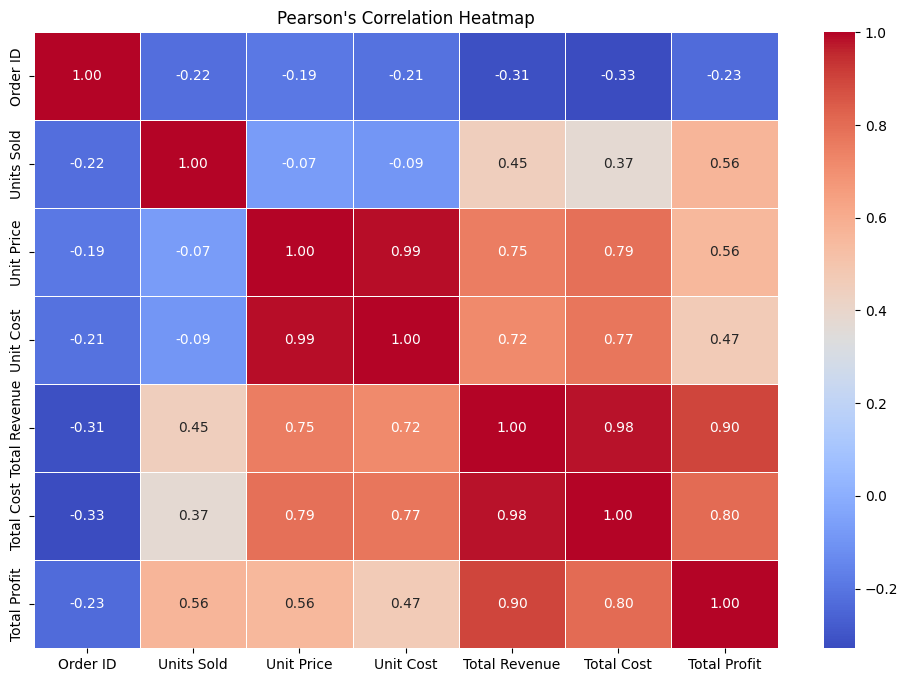

In [15]:
numeric_columns = sales.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson's Correlation Heatmap")
plt.show()

Observation:
>Order ID is has no relation with total profit,total revenue,total cost, units sold,unit price
>units price is moderratly related with total cost and total revenue and strongly related with unit cost


In [16]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Year'] = sales['Order Date'].dt.year
yearly_sales = sales.groupby('Year')['Total Revenue'].sum()
print(yearly_sales)


Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


Observation:Highest Revenue is in the starting year 2012

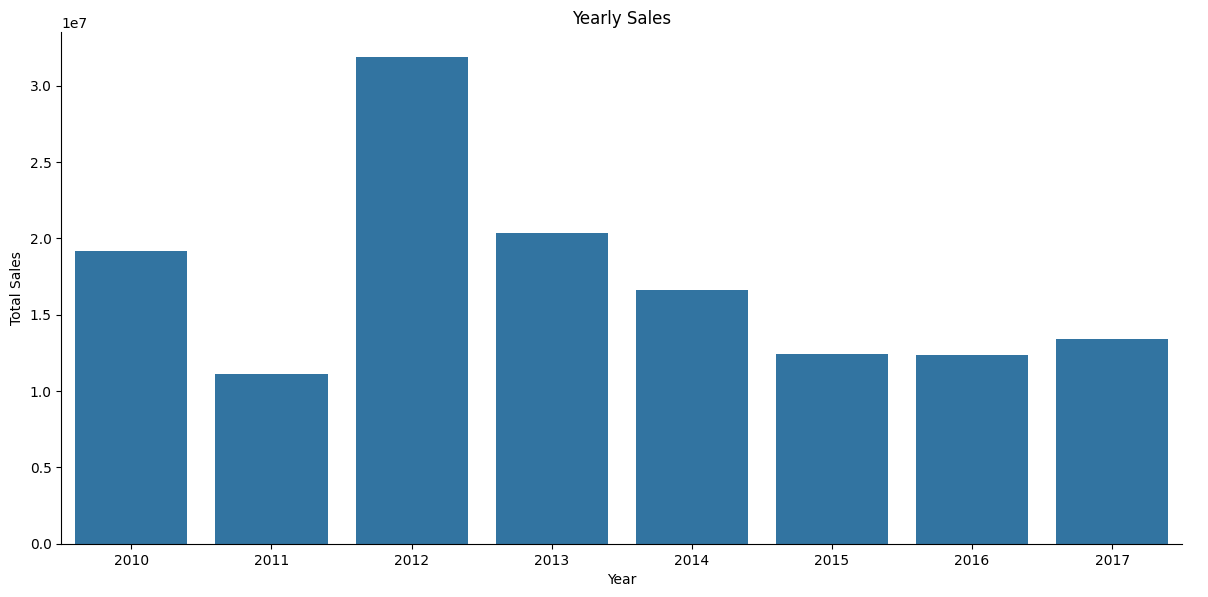

,Year,Total Revenue
0,2010,19186024.92
1,2011,11129166.07
2,2012,31898644.52
3,2013,20330448.66
4,2014,16630214.43
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


In [17]:

sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Extract the year from the 'Order Date'
sales['Year'] = sales['Order Date'].dt.year

# Group the data by year and calculate the total revenue for each year
yearly_sales_df = sales.groupby('Year')['Total Revenue'].sum().reset_index()

sns.catplot(data=yearly_sales_df, x='Year', y='Total Revenue', kind='bar', height=6, aspect=2)

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Display the plot
plt.show()
yearly_sales_df[['Year','Total Revenue']]

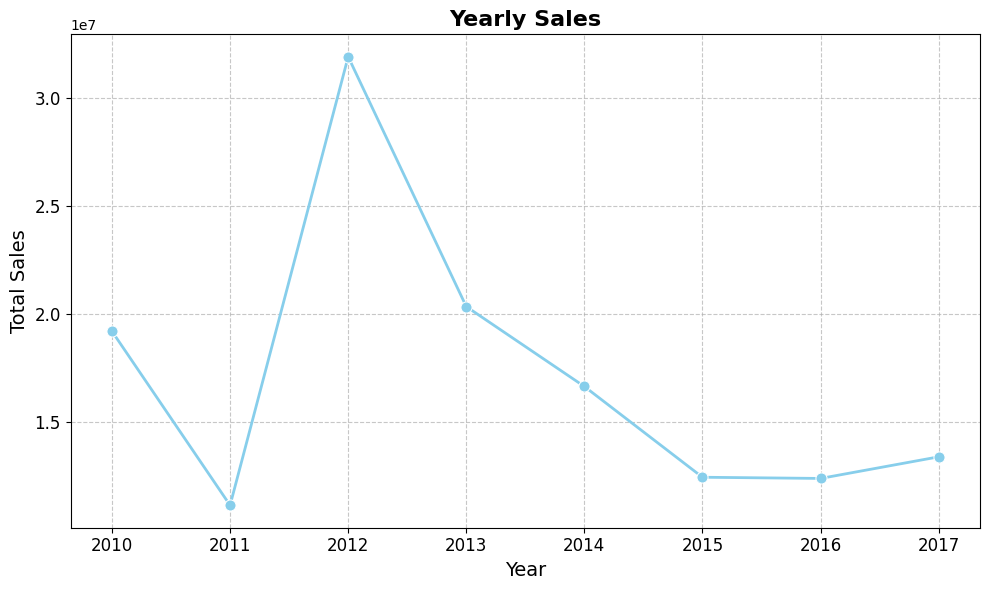

In [18]:
def plot_line_chart(data, x_column, y_column, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=x_column, y=y_column, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


plot_line_chart(yearly_sales_df, 'Year', 'Total Revenue', 'Yearly Sales', 'Year', 'Total Sales')


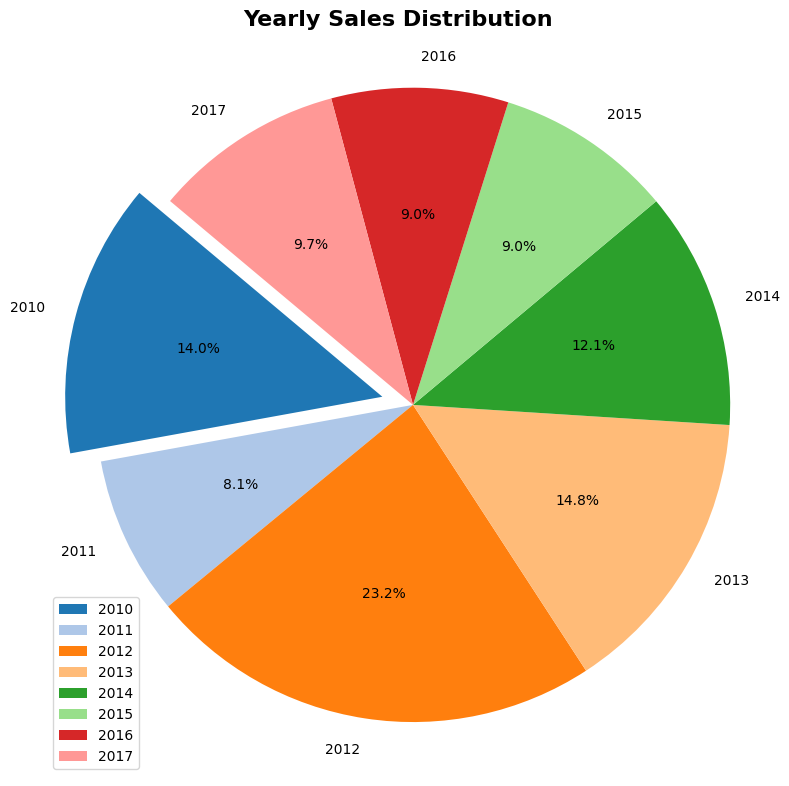

In [19]:
def plot_pie_chart(data, labels, values, title=''):
    plt.figure(figsize=(8, 8))
    explode = [0.1] + [0] * (len(labels) - 1)  # Explode the first slice (2019) slightly
    patches, texts, autotexts = plt.pie(values, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

   
    plt.legend(patches, labels, loc="best")

    plt.tight_layout()
    plt.show()


labels = yearly_sales_df['Year']
values = yearly_sales_df['Total Revenue']


plot_pie_chart(yearly_sales_df, labels, values, 'Yearly Sales Distribution')


Observation:Year 2012 accounted for highest sales(23.2%) followed by year 2010(14.0%)

In [20]:
#Plotting the month-wise sales

sales['Month'] = sales['Order Date'].dt.month


monthly_sales = sales.groupby(['Year', 'Month'])['Total Revenue'].sum()


print(monthly_sales)


Year  Month
2010  2        3410661.12
      5        2587973.26
      6        1082418.40
      10       6064933.75
      11       3458252.00
      12       2581786.39
2011  1        1042225.35
      2         387002.20
      4        2798046.49
      5         272410.45
      6          19103.44
      7          97040.64
      9         574951.92
      11       5938385.58
2012  1        1012884.00
      2        6707849.42
      3         994765.42
      4        4556012.38
      5        3782781.82
      6        2132075.27
      7        4445093.92
      8         576782.80
      9        4648152.72
      10       3042246.77
2013  2        3296425.02
      3         835759.10
      4        3262562.10
      6        1352867.40
      7        8545511.20
      8          89623.98
      9          71253.21
      10       2702770.40
      12        173676.25
2014  2        1819660.25
      4        4510578.10
      5        3060338.59
      6          75591.66
      7         688641.85


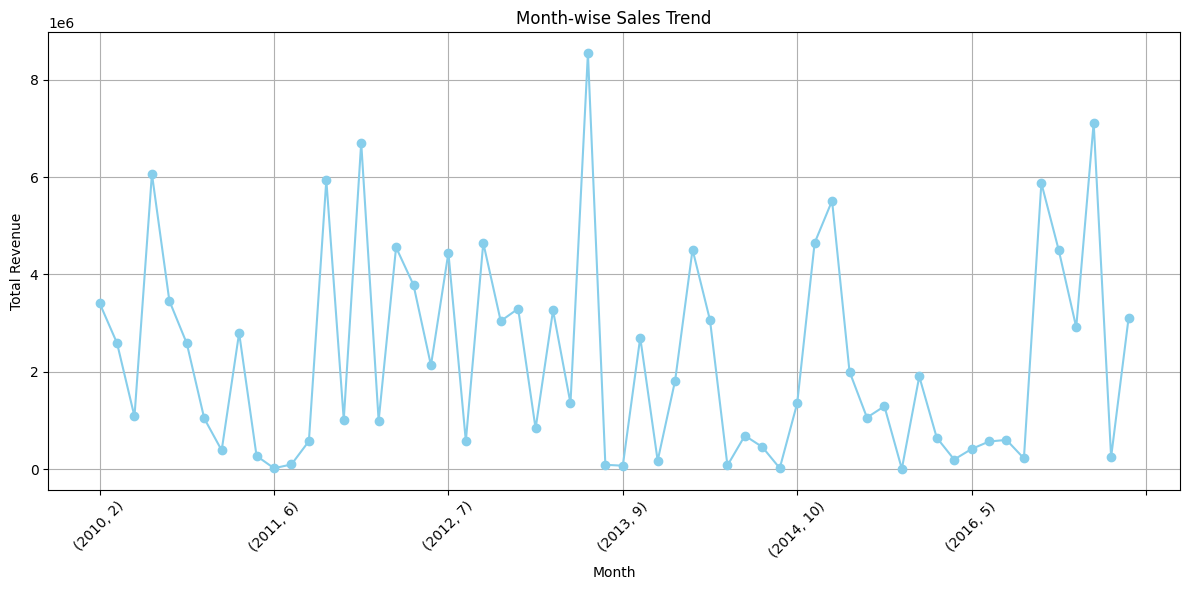

In [21]:
# Plotting the month-wise sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


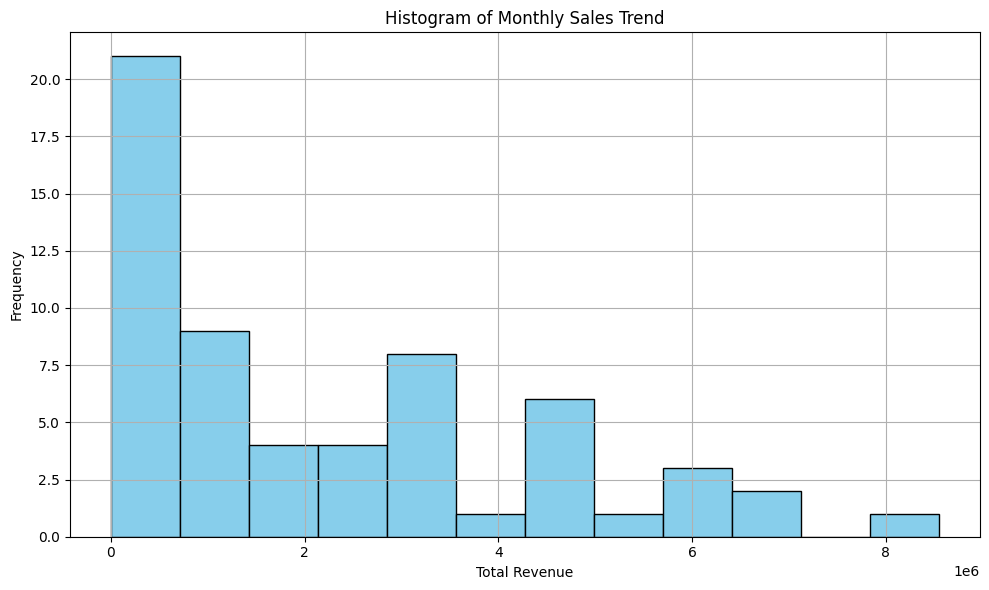

In [22]:
# Plotting the histogram of monthly sales trend
plt.figure(figsize=(10, 6))
plt.hist(monthly_sales, bins=12, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Sales Trend')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


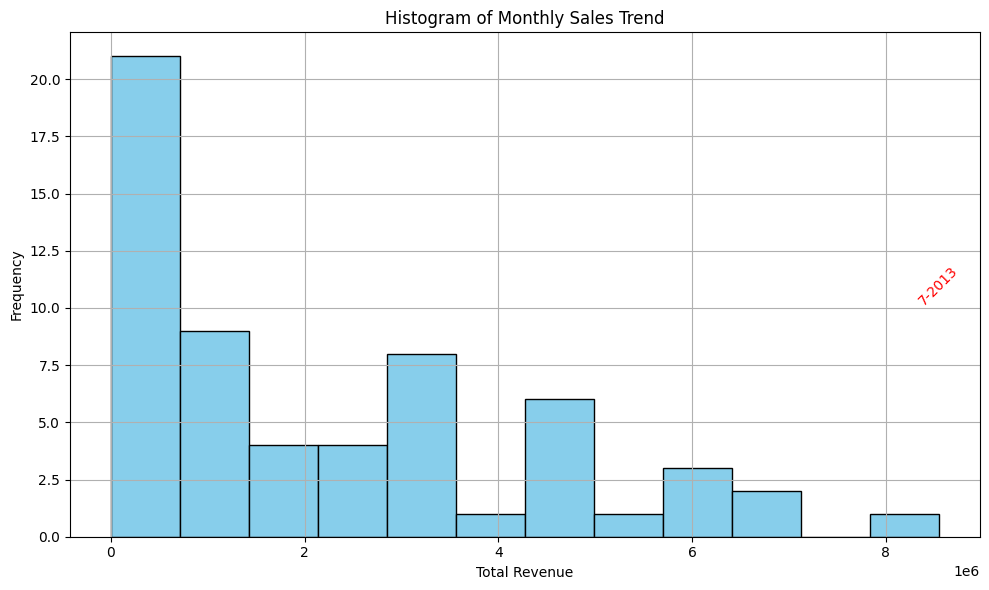

In [23]:
# Find the month of each year with the highest sales
max_sales_month = monthly_sales.idxmax()


plt.figure(figsize=(10, 6))
plt.hist(monthly_sales, bins=12, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Sales Trend')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.grid(True)


if isinstance(max_sales_month, tuple):
    year, month = max_sales_month
    plt.text(monthly_sales.loc[year, month], 10, f'{month}-{year}', rotation=45, ha='center', va='bottom', color='red')
else:
    plt.text(monthly_sales[max_sales_month], 10, f'{max_sales_month}', rotation=45, ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()


So we have that on th month of July-2013 We have the highest sales.

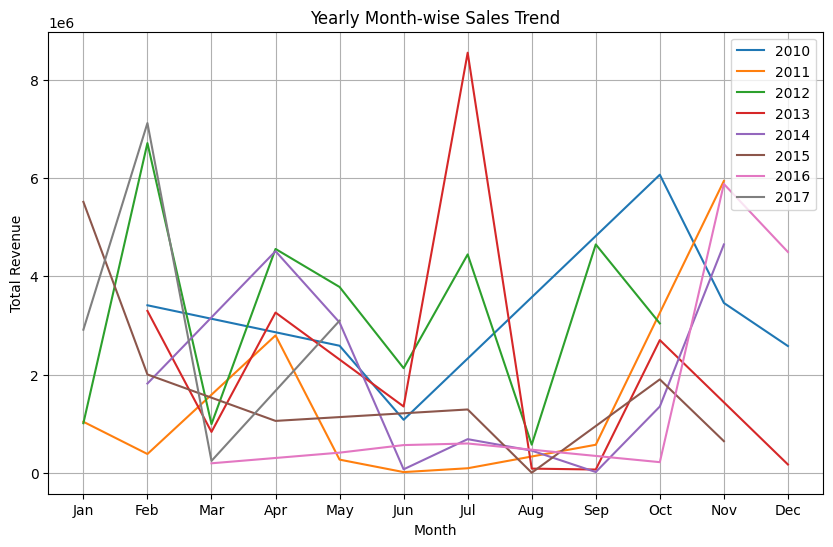

In [24]:
#Getting  yearly_month-wise sales trend


sales['Order Date'] = pd.to_datetime(sales['Order Date'])


sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month


monthly_sales = sales.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()


plt.figure(figsize=(10, 6))
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(data['Month'], data['Total Revenue'], label=year)

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Yearly Month-wise Sales Trend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


Observation:This shows that in the month of july of 2013 has maximum revenue.
>Followed by february month of 2017 and february month of2012

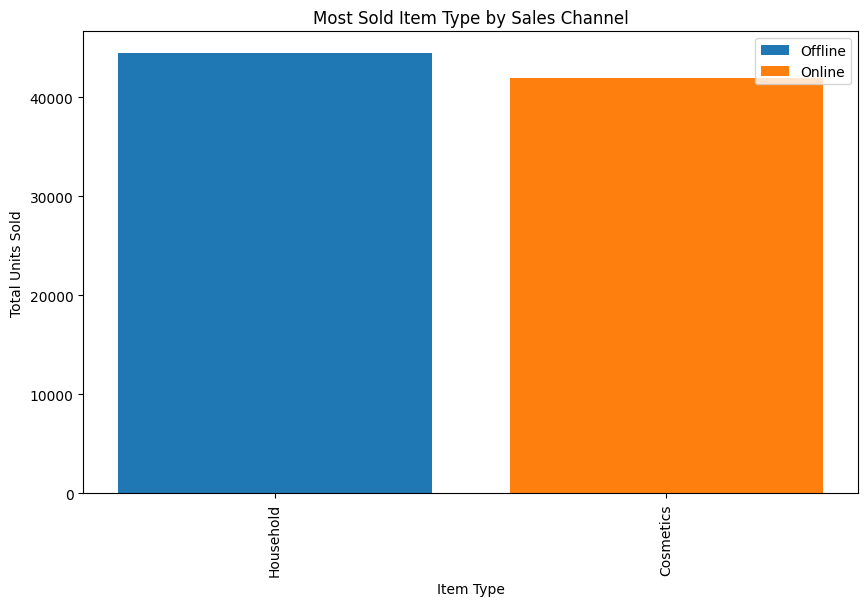

In [25]:
#Creating a barplot for knowing which type of item sold most and either it is online or offline

sales_by_item_channel = sales.groupby(['Item Type', 'Sales Channel'])['Units Sold'].sum().reset_index()


max_sold_by_channel = sales_by_item_channel.loc[sales_by_item_channel.groupby('Sales Channel')['Units Sold'].idxmax()]


plt.figure(figsize=(10, 6))
for channel in max_sold_by_channel['Sales Channel'].unique():
    data = max_sold_by_channel[max_sold_by_channel['Sales Channel'] == channel]
    plt.bar(data['Item Type'], data['Units Sold'], label=channel)

plt.xlabel('Item Type')
plt.ylabel('Total Units Sold')
plt.title('Most Sold Item Type by Sales Channel')
plt.xticks(rotation=90)
plt.legend()

Observation:From the above graph it is cleared that ,The most sold items are 
>Household(Bought maximum through online)

>Cosmetics(bought maximum through offline)

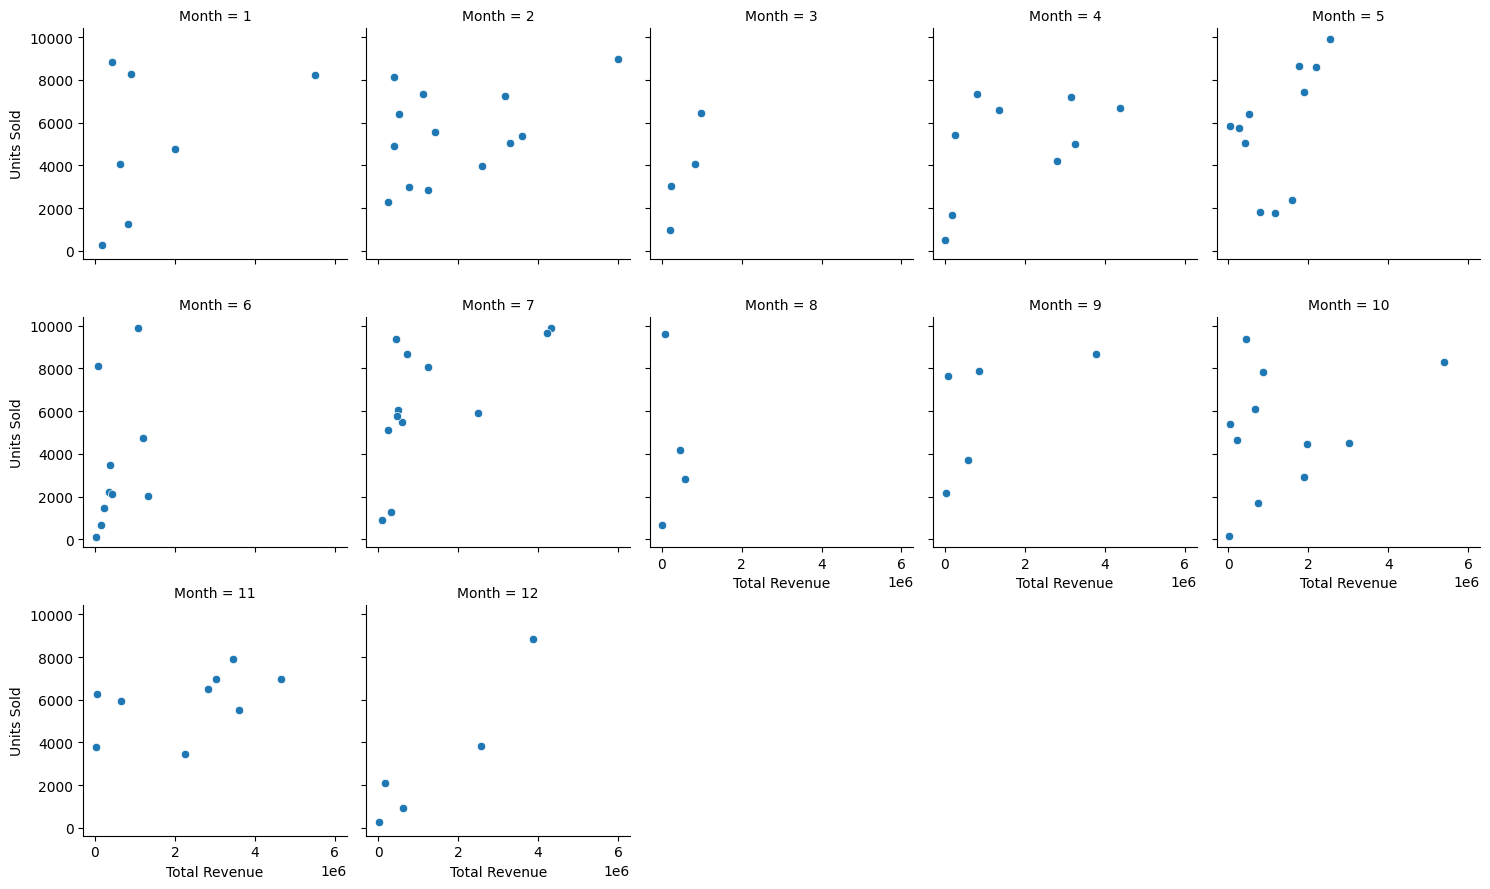

In [26]:
# Creating a scatter plot with multiple facets using Seaborn
sns.relplot(x='Total Revenue', y='Units Sold', data=sales,height= 3, col='Month', col_wrap=5, palette='muted')
plt.show()

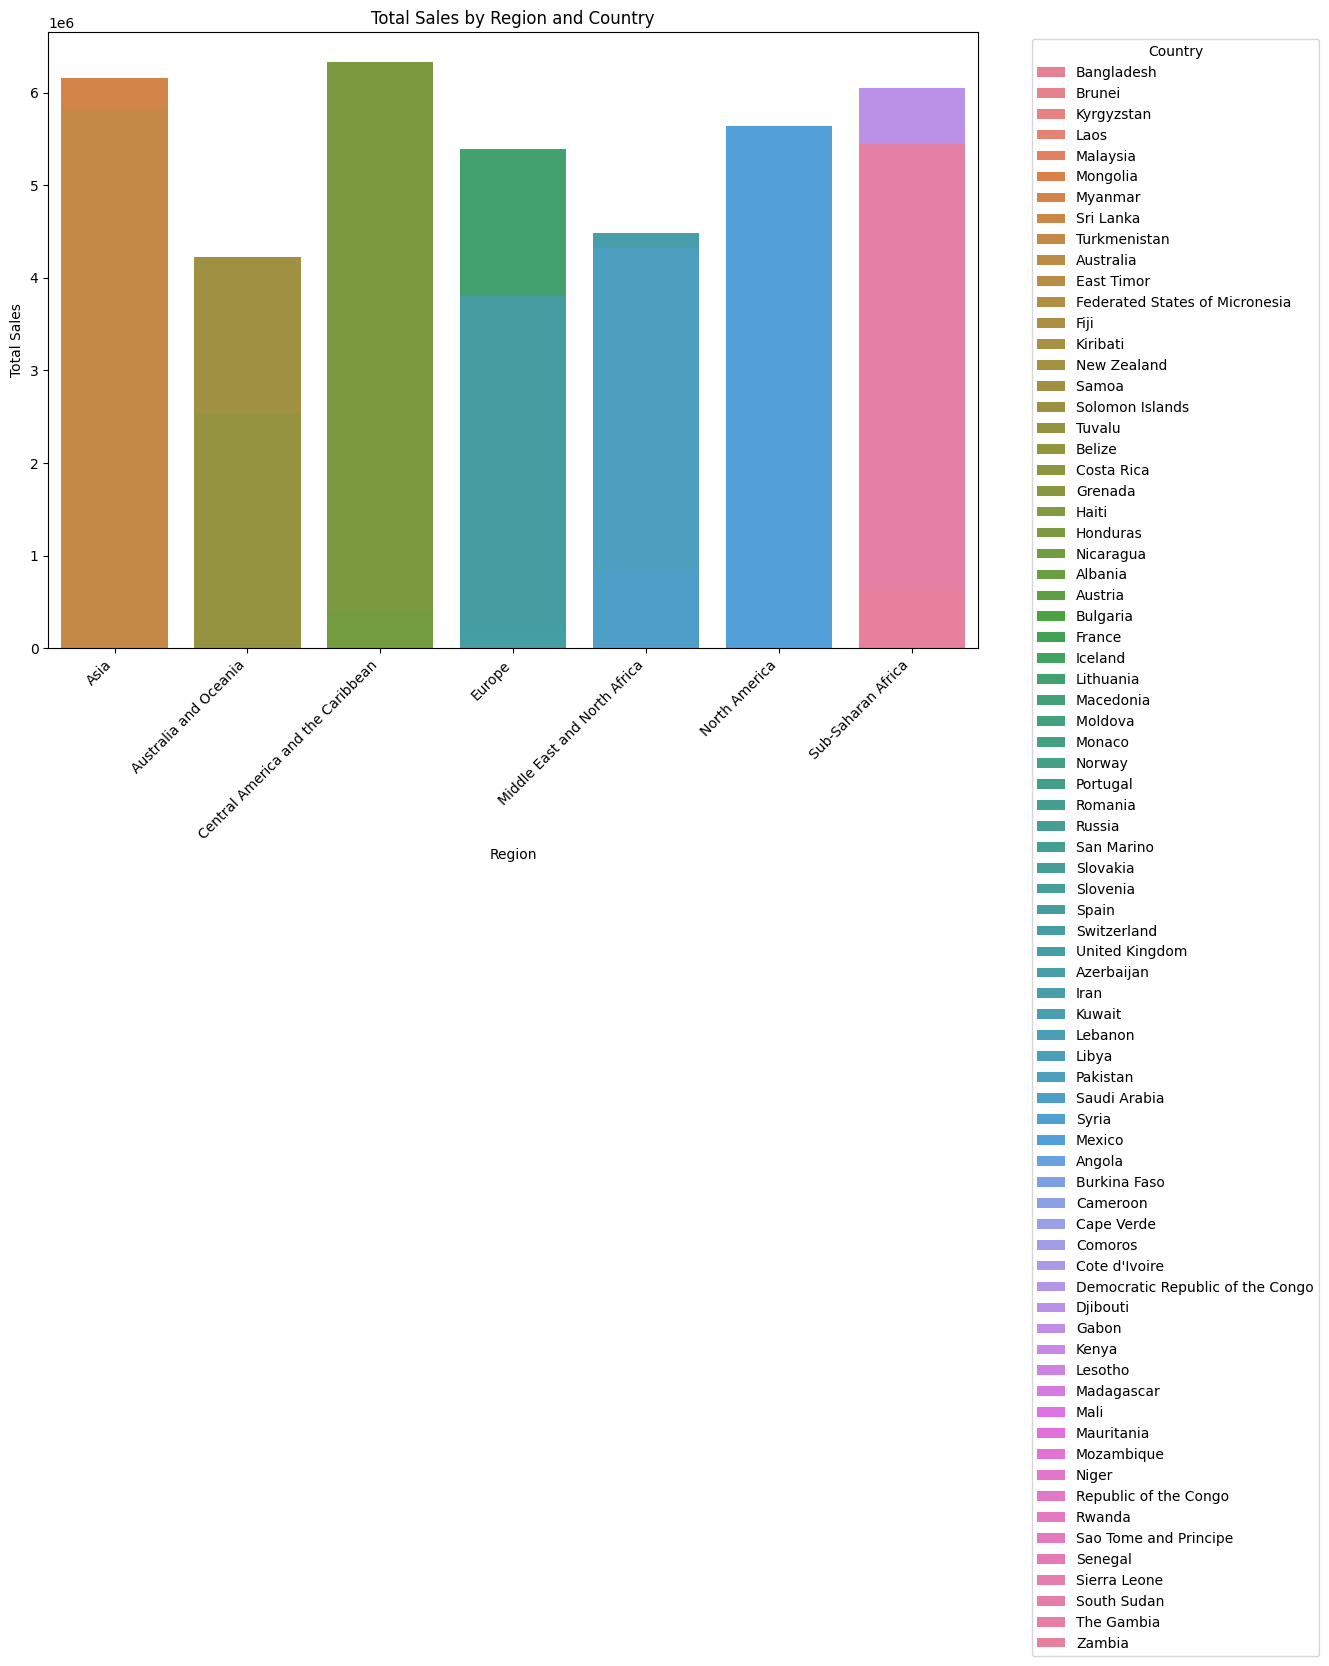

In [27]:
#CREATING a bar plot for knowing which region and which country has most sales.
region_country_sales = sales.groupby(['Region', 'Country'])['Total Revenue'].sum().reset_index()


max_sales_row = region_country_sales.loc[region_country_sales['Total Revenue'].idxmax()]


region_with_highest_sales = max_sales_row['Region']
country_with_highest_sales = max_sales_row['Country']


plt.figure(figsize=(12, 8))
sns.barplot(data=region_country_sales, x='Region', y='Total Revenue', hue='Country', dodge=False)
plt.title('Total Sales by Region and Country')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Observation:
>The region with the highest sales is Central America and the Caribbean, and the country within that region with the highest sales is Honduras.

# Observation:Year 2012 accounted for highest sales(23.2%) followed by year 2010(14.0%).(YEAR WISE)
# Observation:This shows that in the month of july of 2013 has maximum revenue,followed by february month of 2017 and february month of2012.(monthwise)
# From the above graph it is cleared that ,The most sold items are Household(Bought maximum through online),Cosmetics(bought maximum through offline).
# The region with the highest sales is Central America and the Caribbean, and the country within that region with the highest sales is Honduras.

#                                                               END OF THE PROJECT